train a model to predict what the single dice classes are

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set parameters
img_width, img_height = 30, 30
batch_size = 32

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # Assuming 3 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2, 
    horizontal_flip=True,  # Enable horizontal flip
    rotation_range=90# Splitting data into 80% training and 20% validation
)

train_generator = train_datagen.flow_from_directory(
    '/home/bule/projects/Dice/data/single_dices/single_dices/dice_classes',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',  # Specify grayscale images
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/home/bule/projects/Dice/data/single_dices/single_dices/dice_classes',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',  # Specify grayscale images
    subset='validation'
)

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=40  # Adjust the number of epochs according to your needs
)


Found 230 images belonging to 6 classes.
Found 55 images belonging to 6 classes.
Epoch 1/40
7/7 [==============================] - 0s 20ms/step - loss: 1.7713 - accuracy: 0.2677 - val_loss: 1.6981 - val_accuracy: 0.3438
Epoch 2/40
7/7 [==============================] - 0s 20ms/step - loss: 1.7427 - accuracy: 0.2677 - val_loss: 1.7654 - val_accuracy: 0.2812
Epoch 3/40
7/7 [==============================] - 0s 12ms/step - loss: 1.7306 - accuracy: 0.2475 - val_loss: 1.7058 - val_accuracy: 0.2500
Epoch 4/40
7/7 [==============================] - 0s 16ms/step - loss: 1.6981 - accuracy: 0.2475 - val_loss: 1.7306 - val_accuracy: 0.2188
Epoch 5/40
7/7 [==============================] - 0s 19ms/step - loss: 1.6719 - accuracy: 0.2778 - val_loss: 1.5995 - val_accuracy: 0.2812
Epoch 6/40
7/7 [==============================] - 0s 18ms/step - loss: 1.5799 - accuracy: 0.2879 - val_loss: 1.6049 - val_accuracy: 0.2188
Epoch 7/40
7/7 [==============================] - 0s 18ms/step - loss: 1.6128 - accur

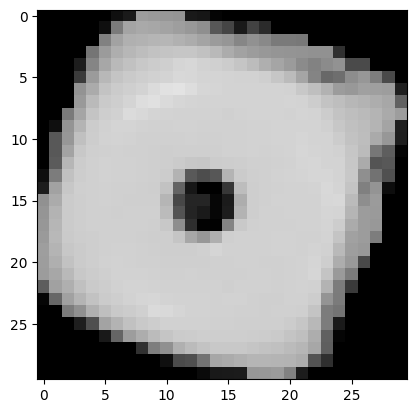

1/1 [==============================] - 0s 8ms/step
[[9.9958140e-01 2.7688311e-05 3.9097472e-04 4.8002461e-12 6.2728878e-10
  1.9545752e-11]]


In [23]:
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np
import matplotlib.pyplot as plt





def make_prediction(model, file_path):
    # Load the image file, converting it to a numpy array
    img = image.load_img(file_path, target_size=(img_width, img_height), color_mode='grayscale')
    img_array = image.img_to_array(img)

    # Rescale the image (as we did for the training images)
    img_array /= 255.0

    # Add a new axis to make the image array compatible with the model (expects a batch)
    img_array = np.expand_dims(img_array, axis=0)

    # Make the prediction
    prediction = model.predict(img_array)

    return prediction

# Usage
# model should be the trained model you want to use for prediction
# '/path/to/image.png' should be the path to the image you want to predict

img_path = "/home/bule/projects/Dice/data/single_dices/single_dices/dice_classes/1/dice25.png"
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

prediction = make_prediction(model, img_path)
print(prediction)


In [24]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('model_single_dices.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model converted to TensorFlow Lite and saved.")


INFO:tensorflow:Assets written to: /tmp/tmpq0qtty1e/assets


INFO:tensorflow:Assets written to: /tmp/tmpq0qtty1e/assets


Model converted to TensorFlow Lite and saved.


2023-11-04 19:38:39.640056: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-11-04 19:38:39.640069: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-11-04 19:38:39.640218: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpq0qtty1e
2023-11-04 19:38:39.640958: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-11-04 19:38:39.640963: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpq0qtty1e
2023-11-04 19:38:39.642671: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:382] MLIR V1 optimization pass is not enabled
2023-11-04 19:38:39.643204: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2023-11-04 19:38:39.670406: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: /tmp/tmpq0qtty1e
2023-11